#### 1. Importing Libraries


In [74]:
import pandas as pd
import seaborn as sns 
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.model_selection import train_test_split

#### 2. Loading and Exploring the Data

In [75]:
df = pd.read_csv('data/weatherHistory.csv')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


#### 3. Data Cleaning and Preparation

In [77]:
columns_to_drop = df.select_dtypes('object').columns
df.drop(columns=columns_to_drop,inplace=True)

In [78]:
# Loud Cover only have 0 values
df.drop(columns='Loud Cover',inplace=True)

In [79]:
df.isna().sum() # 0 missed values

Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
dtype: int64

<Axes: >

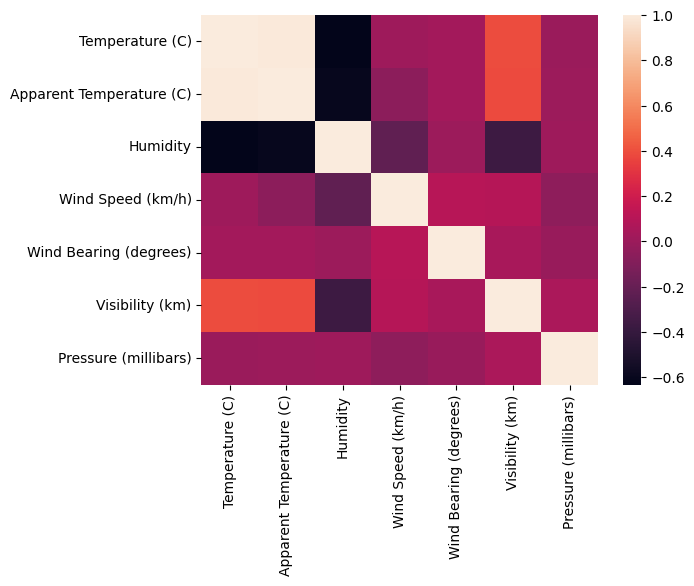

In [80]:
sns.heatmap(df.corr(),)

#### 4. Scaling or Normalizing Data


#### 5. Model Building and Training


In [81]:
x_train, x_test,y_train, y_test = train_test_split(df.drop(columns='Temperature (C)'), df['Temperature (C)'], test_size=0.25)

In [82]:
info = []
df_pred = []
def save_metrics(model, y_test,predictions):
    r2 = r2_score(y_test,predictions)
    rmse = root_mean_squared_error(y_test,predictions)
    mae = mean_absolute_error(y_test,predictions)

    info.append([model,r2,rmse,mae])
    
    df_pred.append(predictions.reshape(-1,1))

In [83]:
linear_models = [LinearRegression, Lasso]

for temp in linear_models:
    
    model_temp = temp()  # Instanciar el modelo
    model_temp.fit(x_train, y_train)  # Ajustar el modelo con los datos de entrenamiento

    predictions = model_temp.predict(x_test)  # Hacer predicciones sobre los datos de prueba

    # Guardar métricas con el nombre del modelo
    save_metrics(f'{temp.__name__}', y_test, predictions)

#### 6. Model Evaluation

In [84]:
pd.DataFrame(info, columns=['model','r2','rmse','mae'])

,model,r2,rmse,mae
0,LinearRegression,0.990060,0.952679,0.746971
1,Lasso,0.989214,0.992383,0.771288


In [86]:
combined_array = np.hstack([y_test.values.reshape(-1,1), df_pred[0], df_pred[1]])
pd.DataFrame(combined_array,columns=['Test','Linear Predict','Lasso Predict'])

,Test,Linear Predict,Lasso Predict
0,-3.883333,-5.823014,-6.184670
1,12.111111,12.044789,12.551197
2,12.855556,15.084339,14.790554
3,28.838889,27.834605,27.322167
4,12.111111,14.026747,13.694091
...,...,...,...
24109,1.694444,0.475199,0.655382
24110,18.105556,18.656743,18.443380
24111,6.211111,5.486059,5.301247
24112,4.950000,4.272548,3.941709
